# House Prediction Dataset
### Objective
- Supervised Learning (Regression problem) by predicting house prices based on features (squart feet, number of floors, etc)


## 1. DATA COLLECTION 
- Collect the data from kaggle with CSV format

## 2. EXPLORATORY DATA ANALYSIS & DATA CLEANING
- Statiscial summary
- Dataset shape
- Datatypes (numerical, categorical)
- Categorical (ordinal and nominal)
- Pearson Correlation
- Target values visualization 
- Plot Distribution 

## 3. FEATURE ENGINEERING
- Manipulate features
- Fill Missing Values if any
- Binary Classification Problem 
- If model is tree based method, no scaling is needed 
- If model used gradient descent, use scaling (ANN, Linear Regression, Logistic-Regression, etc)
- If scaling is needed, implement Standard Scaler (z-score), Gussian Distribution, etc


## 4. FEATURE SELECTION
- Dropping low variance features 
- Information Gain-Mutual Information in Regression Problems
- Pearson Correlation 
- Tree-based Selection using ExtraTreesRegression (Feature Importance)
- 3-D chart top two features with target values

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from pprint import pprint
import pylab
from sklearn.feature_selection import VarianceThreshold, mutual_info_regression
from sklearn.tree import ExtraTreeRegressor
from sklearn.preprocessing import StandardScaler

# Data Collection

In [56]:
# import data
df = pd.read_csv('../inputs/train.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


# EXPLORATORY DATA ANALYSIS & DATA CLEANING
## Statiscial summary
## Dataset shape
## Datatypes (numerical, categorical)
## Categorical (ordinal and nominal)
## Pearson Correlation
## Target values visualization 
## Plot Distribution 

In [3]:
print(f'DataFrame has {df.shape[0]} Rows and {df.shape[1]} Columns')

DataFrame has 4600 Rows and 18 Columns


In [4]:
# number of features with data types (int, float, and object)
# must convert all dataset into numerical features 
df.dtypes.value_counts()

int64      9
object     5
float64    4
dtype: int64

In [5]:
features = df.columns
numerical_feat = [features for features in df.columns if df[features].dtypes != 'O']
print(f'Number of Numerical Features: {len(numerical_feat)}')

categorical_feat = [features for features in df.columns if df[features].dtypes == 'O']
print(f'Number of Categorical Features: {len(categorical_feat)}')

Number of Numerical Features: 13
Number of Categorical Features: 5


In [6]:
# collect all dtpyes in 3 classes (object, int, float)
pprint(df.columns.to_series().groupby(df.dtypes).groups)

{dtype('int64'): Index(['sqft_living', 'sqft_lot', 'waterfront', 'view', 'condition',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated'],
      dtype='object'),
 dtype('float64'): Index(['price', 'bedrooms', 'bathrooms', 'floors'], dtype='object'),
 dtype('O'): Index(['date', 'street', 'city', 'statezip', 'country'], dtype='object')}


In [7]:
# statistical summary of object dtypes columns (categorical)
df.describe(include=[np.object])

,date,street,city,statezip,country
count,4600,4600,4600,4600,4600
unique,70,4525,44,77,1
top,2014-06-23 00:00:00,2520 Mulberry Walk NE,Seattle,WA 98103,USA
freq,142,4,1573,148,4600


In [8]:
# statistical summary of (numerical) dtypes  
# check for significant min/max values
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [9]:
# create a pandas dataframe of each features, data-type, percentage of num of null values
# helps identify null values for each feature 
df_details = pd.DataFrame(df.dtypes).T.rename(index={0:'datatype'})
df_details = df_details.append(pd.DataFrame(df.isnull().sum()/len(df)*100).T.rename(index={0:'pct_null_values'}))
df_details

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
datatype,object,float64,float64,float64,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64,object,object,object,object
pct_null_values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
def plot_distribution(dataframe, feature):
	""" Plot Histogram, QQplot, and Boxplot distribtuion 
	Args:
	dataframe: [pandas DataFrame]: training dataframe
	feature: numerical feature 
	"""
	plt.figure(figsize=(25,6))
	# first row, 1st column
	plt.subplot(1, 3, 1)
	sns.distplot(dataframe[feature])
	# first row, 2nd column
	plt.subplot(1, 3, 2)
	stats.probplot(dataframe[feature], dist='norm', plot=pylab)
	# first row, 3rd column
	plt.subplot(1, 3, 3)
	# plt.boxplot(dataframe[feature], vert=False)
	sns.boxplot(data=dataframe[feature], orient="h", palette="Set2")
	plt.show()

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


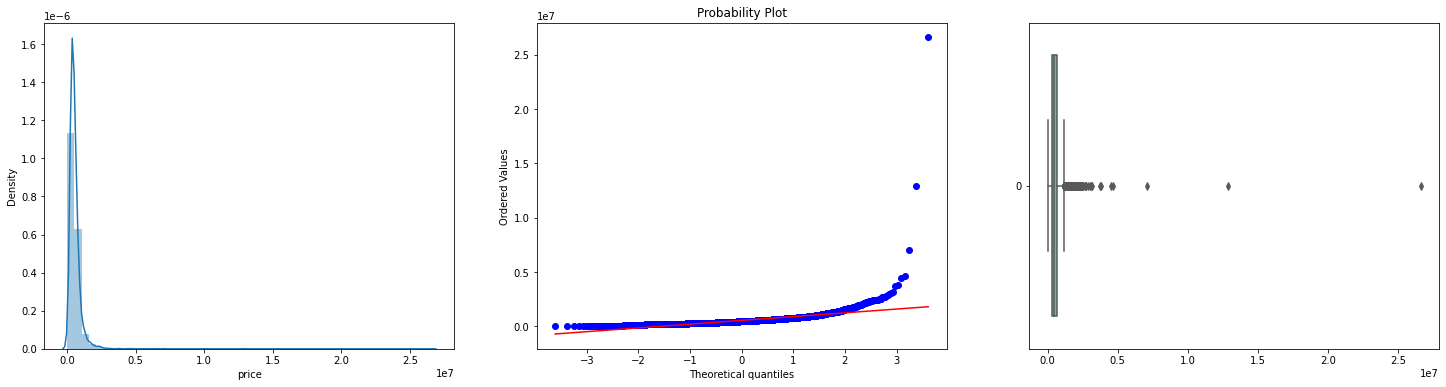

In [11]:
# Explore target values 
plot_distribution(df, 'price')
# outliers are detected

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


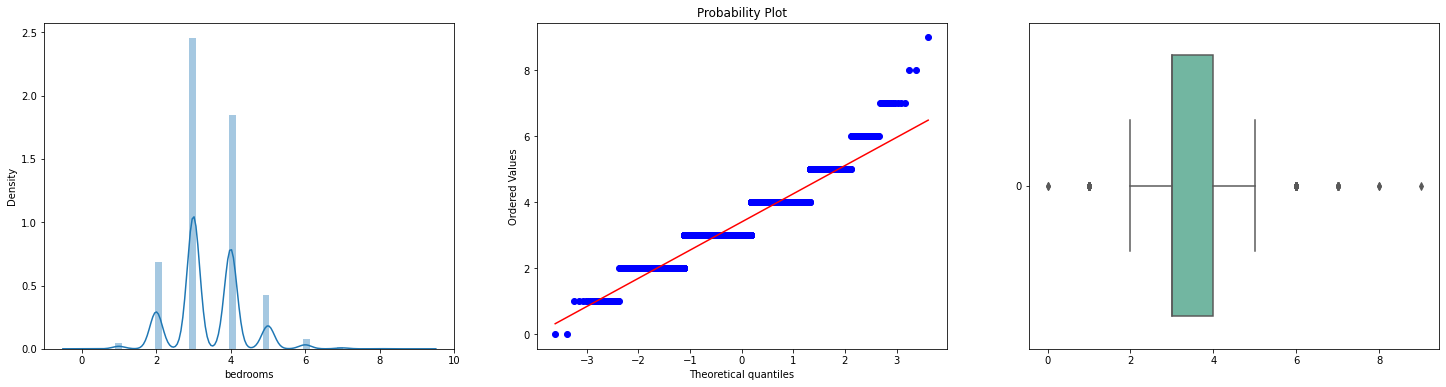

In [12]:
plot_distribution(df, 'bedrooms')

In [13]:
def strip_plot(x_feature, y_target, dataframe):
    plt.rcParams['figure.figsize'] = (20.0, 10.0)
    sns.stripplot(x = x_feature, y = y_target, data = dataframe, jitter=True, palette="Blues_d")

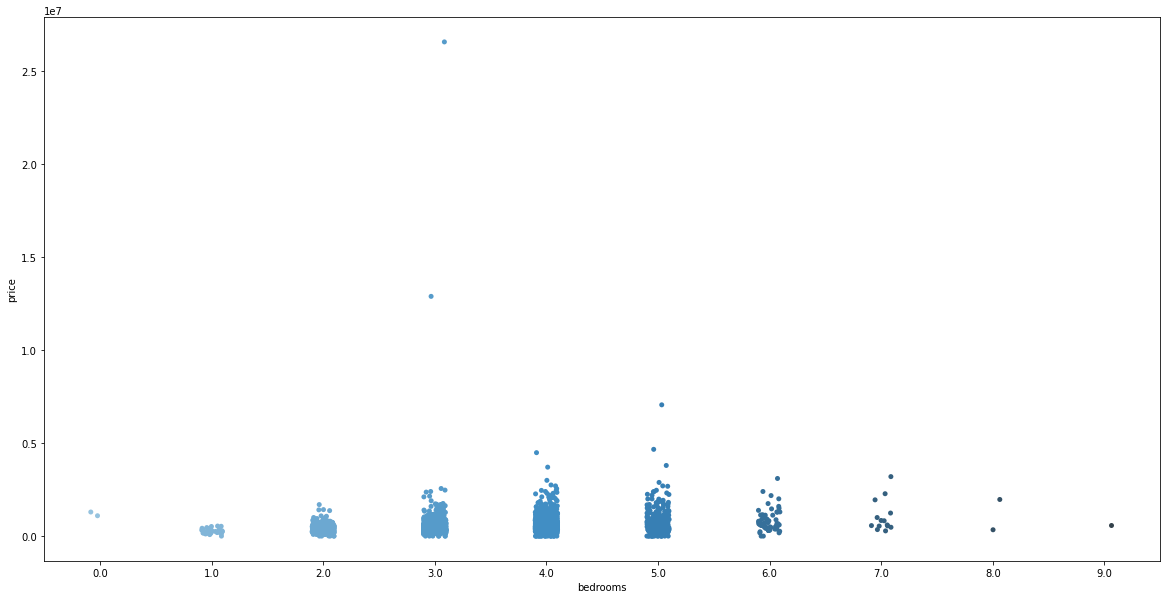

In [14]:
strip_plot('bedrooms', 'price', df)

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


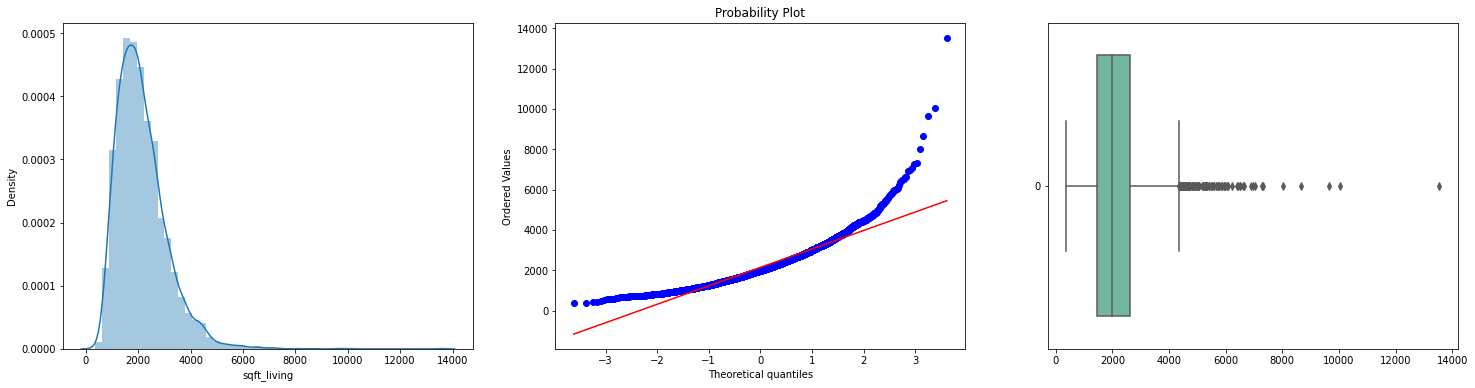

In [15]:
plot_distribution(df, 'sqft_living')
# outliers are detected

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


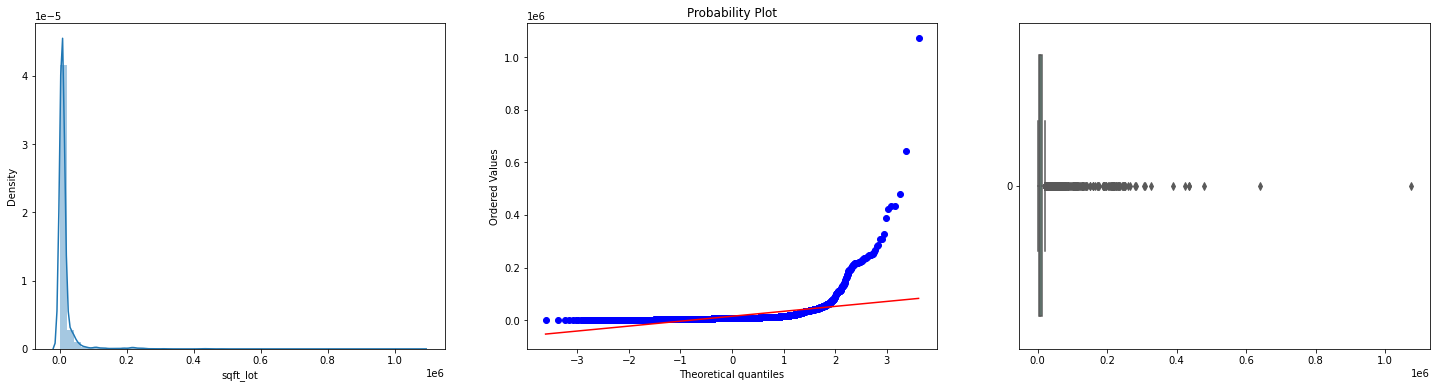

In [16]:
plot_distribution(df, 'sqft_lot')
# outliers are detected

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


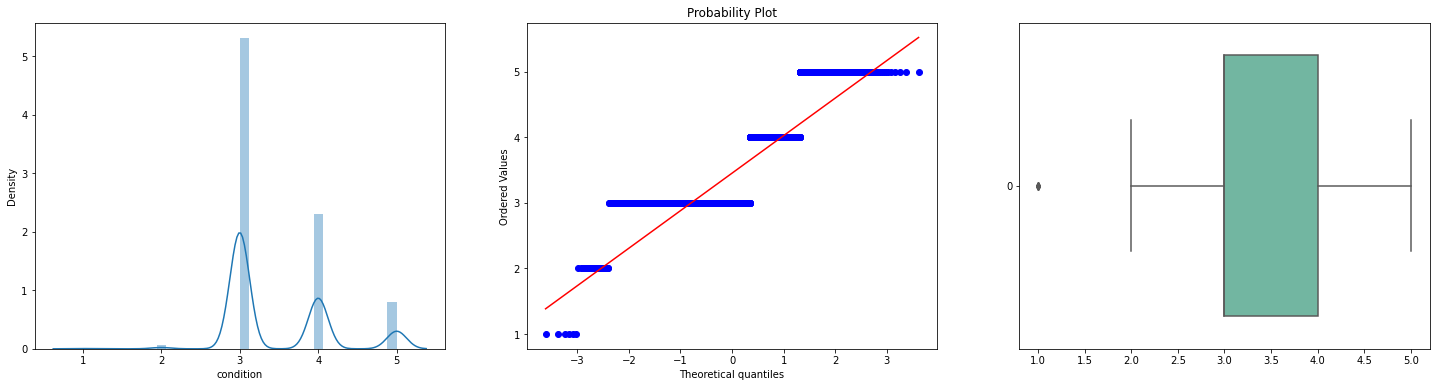

In [17]:
plot_distribution(df, 'condition')

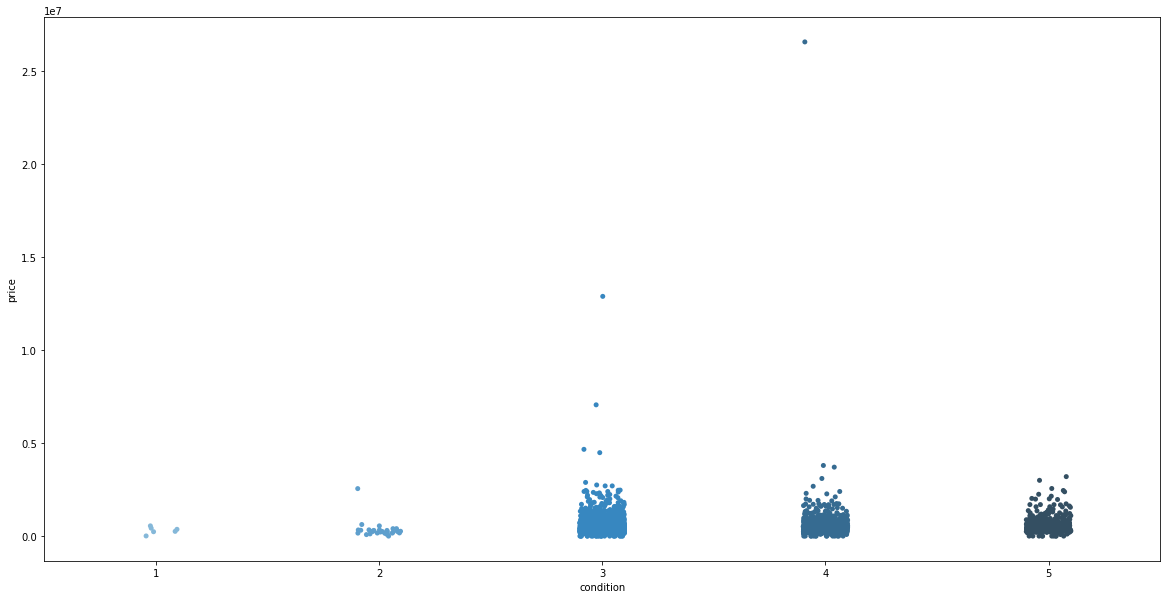

In [18]:
strip_plot('condition', 'price', df)

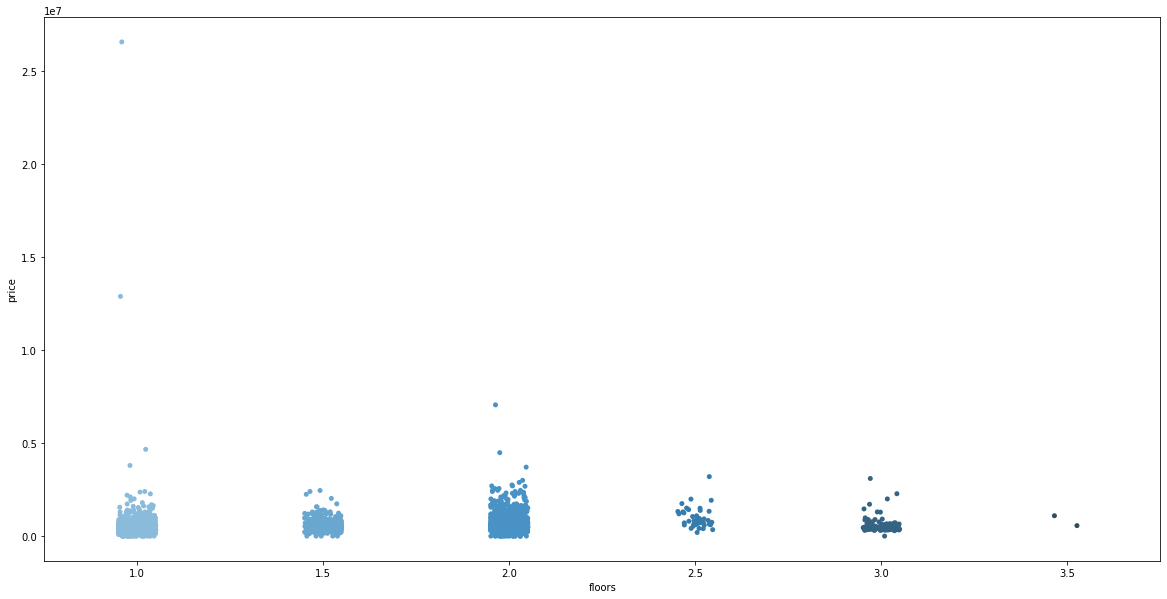

In [19]:
strip_plot('floors', 'price', df)

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


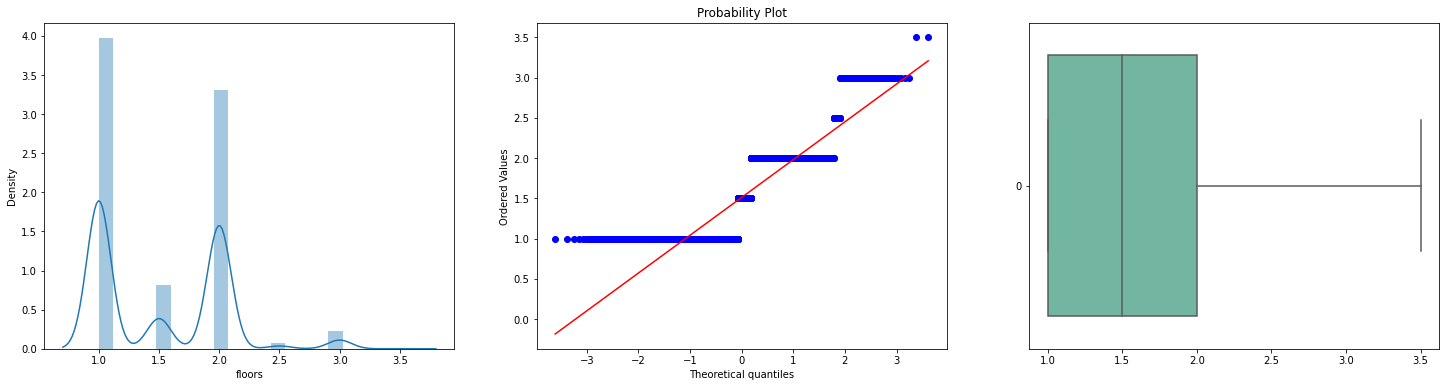

In [20]:
plot_distribution(df, 'floors')

In [21]:
def double_plot(feature):
    sns.set(style="ticks")
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(21.7, 8.27),
                                        gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(df[feature], ax=ax_box)
    sns.histplot(df[feature], ax=ax_hist)
    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


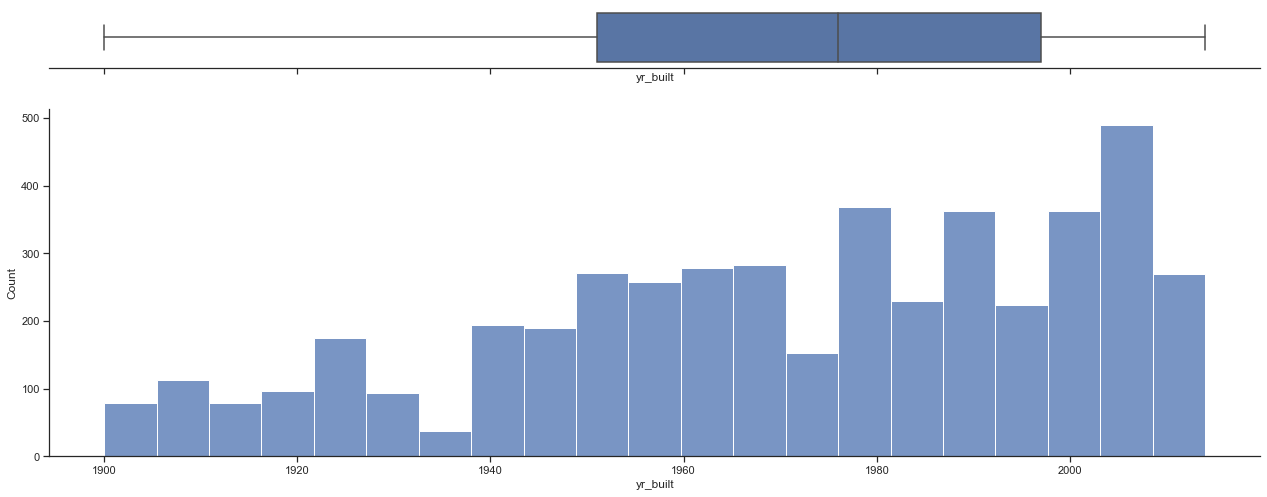

In [22]:
double_plot('yr_built')

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


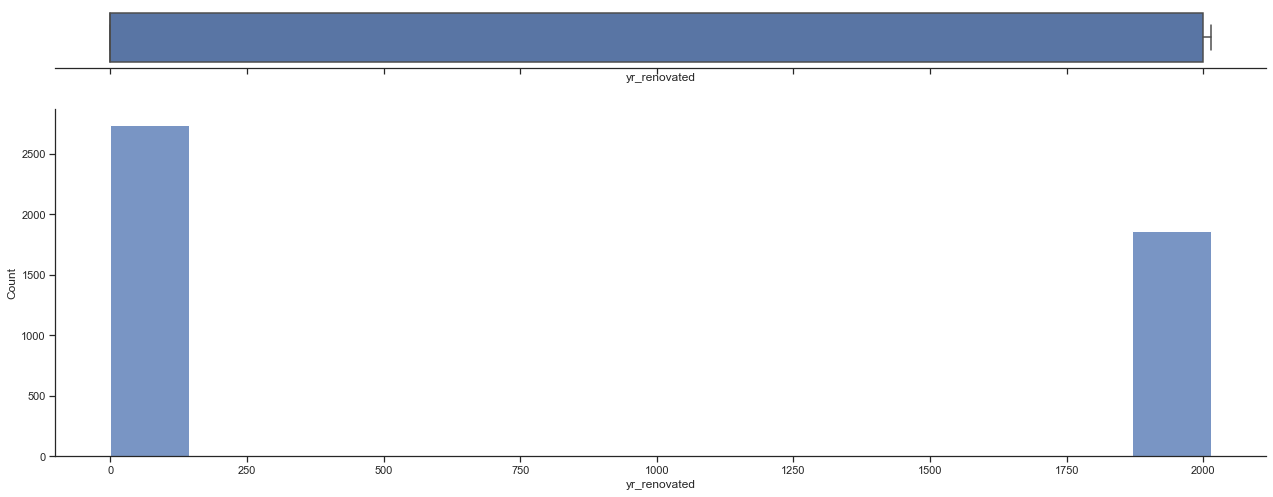

In [23]:
double_plot('yr_renovated')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 [Text(0, 0, 'Shoreline'),
  Text(1, 0, 'Seattle'),
  Text(2, 0, 'Kent'),
  Text(3, 0, 'Bellevue'),
  Text(4, 0, 'Redmond'),
  Text(5, 0, 'Maple Valley'),
  Text(6, 0, 'North Bend'),
  Text(7, 0, 'Lake Forest Park'),
  Text(8, 0, 'Sammamish'),
  Text(9, 0, 'Auburn'),
  Text(10, 0, 'Des Moines'),
  Text(11, 0, 'Bothell'),
  Text(12, 0, 'Federal Way'),
  Text(13, 0, 'Kirkland'),
  Text(14, 0, 'Issaquah'),
  Text(15, 0, 'Woodinville'),
  Text(16, 0, 'Normandy Park'),
  Text(17, 0, 'Fall City'),
  Text(18, 0, 'Renton'),
  Text(19, 0, 'Carnation'),
  Text(20, 0, 'Snoqualmie'),
  Text(21, 0, 'Duvall'),
  Text(22, 0, 'Burien'),
  Text(23, 0, 'Covington'),
  Text(24, 0, 'Inglewood-Finn Hill'),
  Text(25, 0, 'Kenmore'),
  Text(26, 0, 'Newcastle'),
  Text(27, 0, 'Mercer Island'),
  Text(28, 0, 'Bl

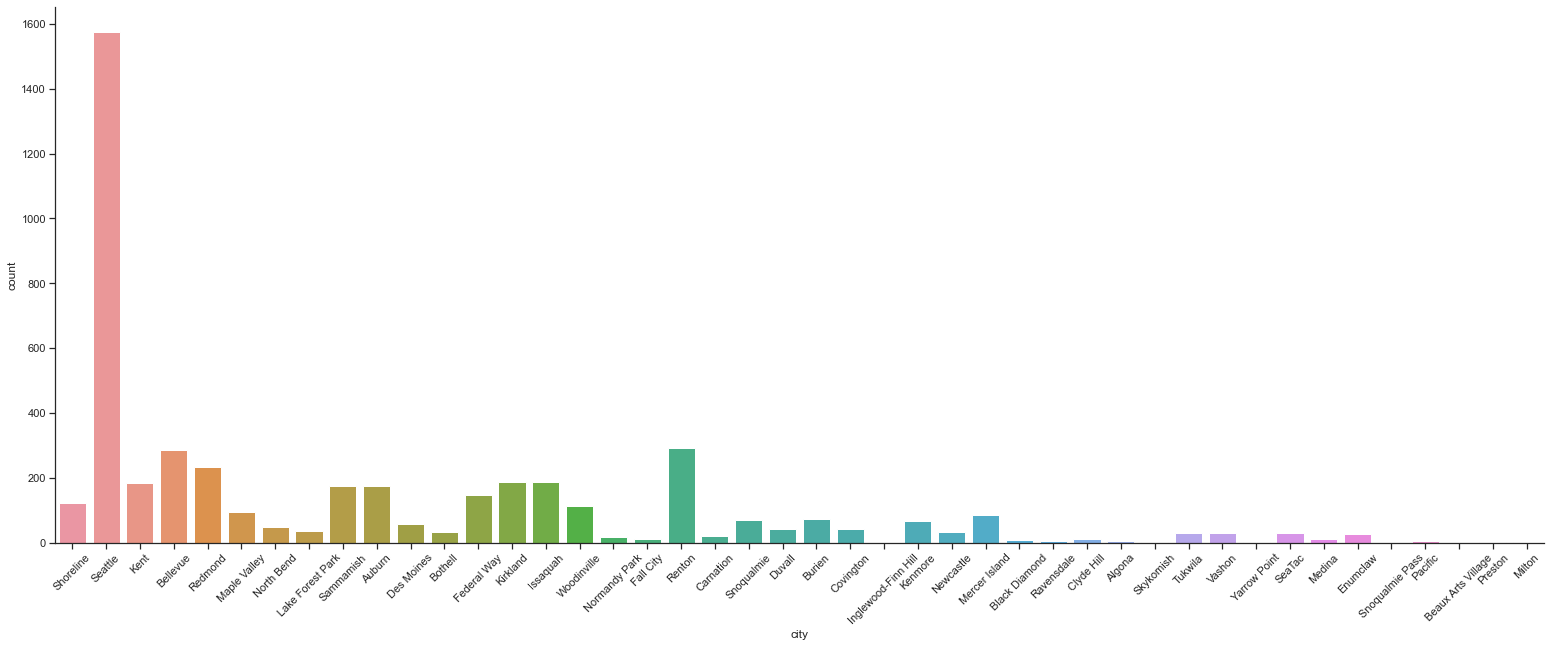

In [24]:
# figure size in inches
sns.catplot(x="city", kind="count", data=df, height=8.27, aspect=21.7/8.27)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees


# FEATURE ENGINEERING
## Data Manipulation with Year built, Year renovated
## Set price as target values 
## If model is tree based method, no scaling is needed 
## If model used gradient descent, use scaling (ANN, Linear Regression, Logistic-Regression, KMeans, etc)
## If scaling is needed, implement Standard Scaler (z-score), Gussian Distribution, etc
## One-hot-encode on top 15 major cities
## Mean encode zip-code


In [25]:
# manipulate yr_built feature
# get the difference (num of years since built)
df.yr_built = 2021 - df.yr_built

In [26]:
# manipulate yr_renovated feature
# get the number of years since renovated, if not set to 0
df.yr_renovated = 2021 - df.yr_renovated
df.yr_renovated = np.where(df.yr_renovated > 2020, 0, df.yr_renovated)

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


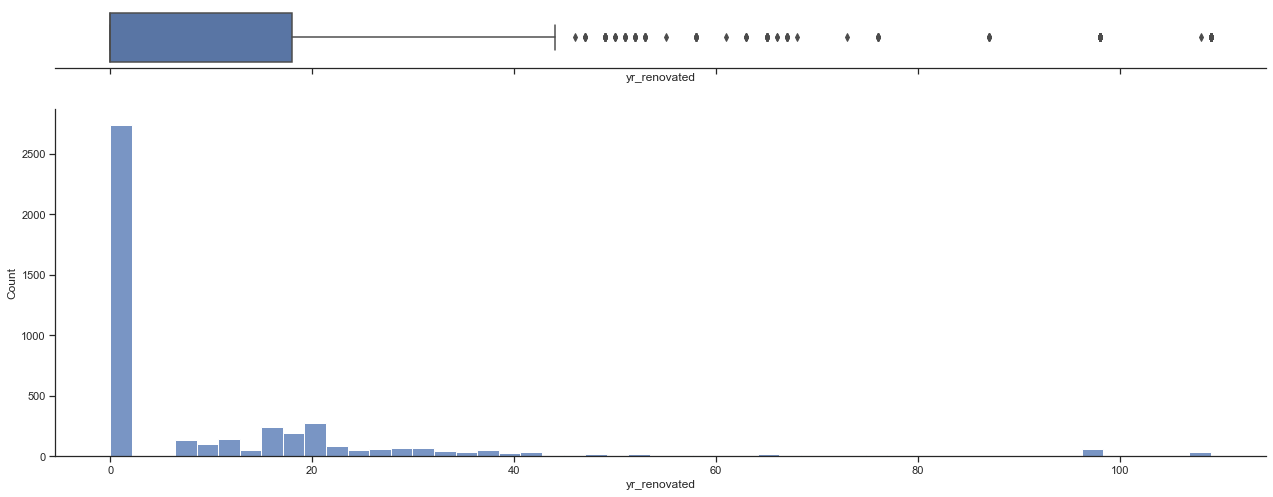

In [27]:
double_plot('yr_renovated')

In [28]:
# filter out outliers that are greater than 3 std from mean
outliers = []
def detect_outliers(col):
    mu = np.mean(col)
    std = np.std(col)
    
    for i in col:
        z_score = (i - mu)/ std
        if np.abs(z_score) > 3:
            outliers.append(i)
    return outliers
    
outlier_pt=detect_outliers(df.yr_renovated)
print(df.shape)
df = df[~df.yr_renovated.isin(outlier_pt)]
print(df.shape)

(4600, 18)
(4494, 18)


/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


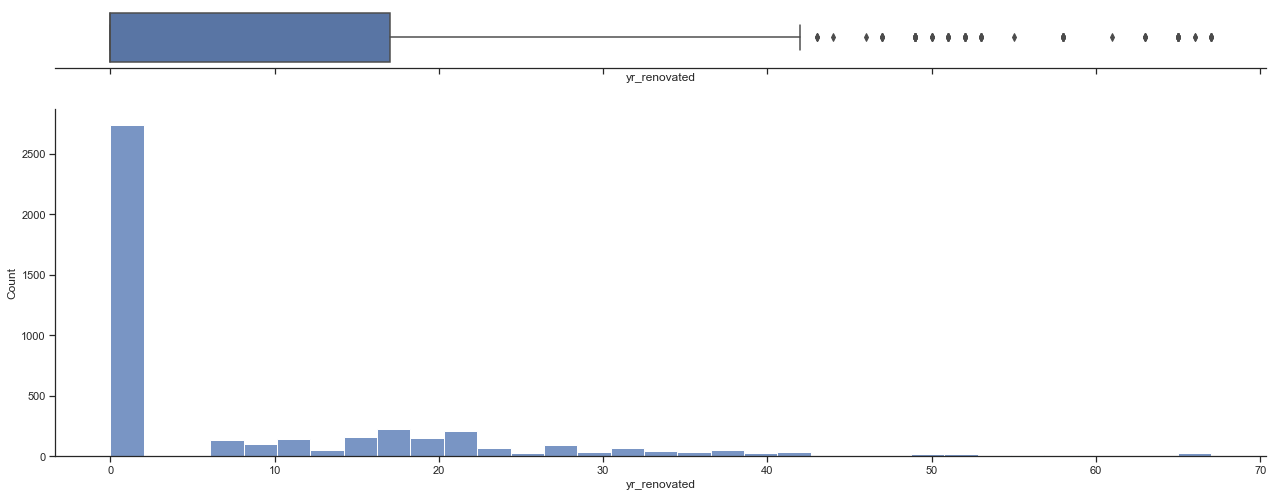

In [29]:
double_plot('yr_renovated')

In [30]:
# filter out outliers that are greater than 3 std from mean on target values 
outlier_pt=detect_outliers(df.price)
print(df.shape)
df = df[~df.price.isin(outlier_pt)]
print(df.shape)

(4494, 18)
(4461, 18)


/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


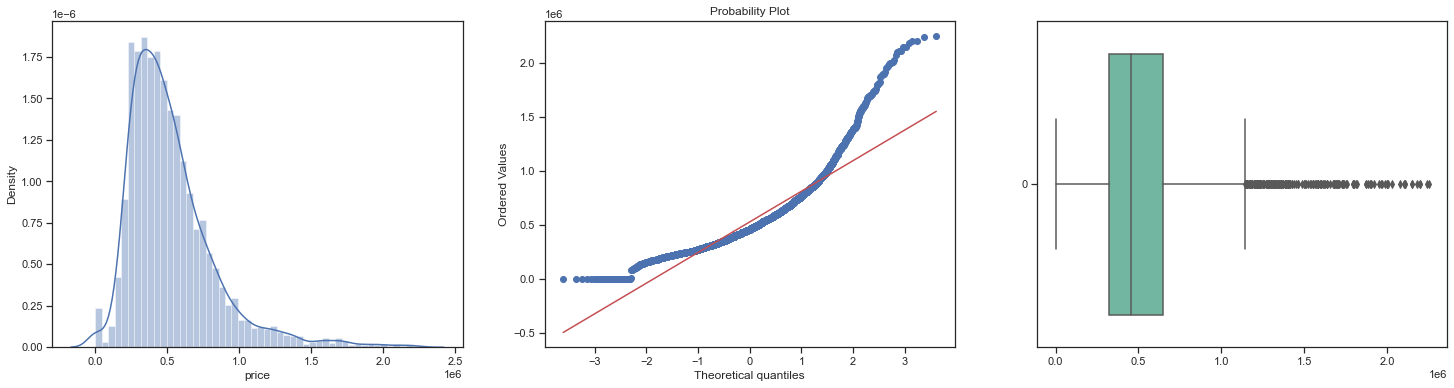

In [31]:
plot_distribution(df, 'price')

In [32]:
# remove WA from statezip zip column and convert to int64
df.statezip = df.statezip.str.replace(r'\D', '')
df.statezip = pd.to_numeric(df.statezip,errors='coerce')

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


# Drop unnecessary columns

In [33]:
df.drop(['date', 'street', 'country'], axis=1, inplace=True)

In [34]:
# get city unique values
print(len(df.city.value_counts()))
# extract the top ten and one hot encode 
top_15 = [x for x in df.city.value_counts().sort_values(ascending=False).head(15).index]
print(top_15)

44
['Seattle', 'Renton', 'Bellevue', 'Redmond', 'Issaquah', 'Kirkland', 'Kent', 'Auburn', 'Sammamish', 'Federal Way', 'Shoreline', 'Woodinville', 'Maple Valley', 'Mercer Island', 'Burien']


In [35]:
# one hot encode on top 15 citites, the rest set to 0 
def ohe_city(df, variable, top_x_labels):
    for label in top_x_labels:
        df[variable+'_'+label] = np.where(df[variable]==label, 1, 0)
        
        
ohe_city(df, 'city', top_15)
df.drop('city', axis=1, inplace=True)
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'statezip', 'city_Seattle', 'city_Renton',
       'city_Bellevue', 'city_Redmond', 'city_Issaquah', 'city_Kirkland',
       'city_Kent', 'city_Auburn', 'city_Sammamish', 'city_Federal Way',
       'city_Shoreline', 'city_Woodinville', 'city_Maple Valley',
       'city_Mercer Island', 'city_Burien'],
      dtype='object')

In [36]:
# get number of unique values for zipcode
len(df.statezip.value_counts())

77

In [37]:
# feature engineer the zipcode by target encoding 
# getting the mean price (target value) for each zipcode 
city_target_encode = df.groupby(['statezip'])['price'].mean().to_dict()
df['statezip'] =  df['statezip'].map(city_target_encode)
df.statezip


0       374433.232975
2       320953.503608
3       560166.428571
4       634790.023595
5       595001.881696
            ...      
4595    374433.232975
4596    639103.418803
4597    491313.489647
4598    255058.732269
4599    320953.503608
Name: statezip, Length: 4461, dtype: float64

In [38]:
# plot correlation 
def pearson_corr(dataframe):
    corr = dataframe.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

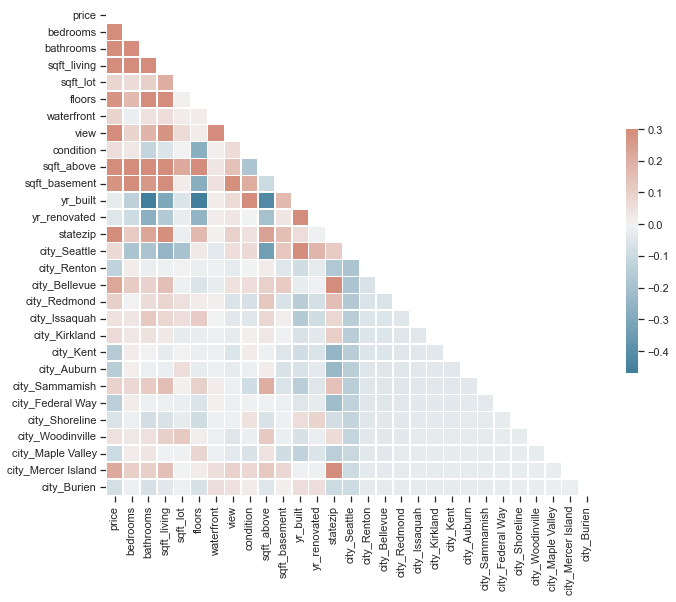

In [39]:
pearson_corr(df)

# FEATURE SELECTION
- Dropping low variance features 
- Information Gain-Mutual Information in Regression Problems
- Pearson Correlation 
- Tree-based Selection using ExtraTreesRegression (Feature Importance)

In [40]:
var_threshold = VarianceThreshold(threshold=0.2)
var_threshold.fit(df)

# get the number of feature coumns with 0 variance 
constant_col = [col for col in df.columns if col not in df.columns[var_threshold.get_support()]]
# drop feature with 0 variance (constanct features) 
df.drop(constant_col[0], axis=1, inplace=True)

print(constant_col[0])

waterfront


In [41]:
def drop_corr(df, threshold):
	# set of all the names of correlated columns
    col_corr = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
			# get the coefficient value
            if corr_matrix.iloc[i, j] > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
    
corr_features = drop_corr(df, 0.85)
print(corr_features)
df.drop(corr_features, axis=1, inplace=True)

{'sqft_above'}


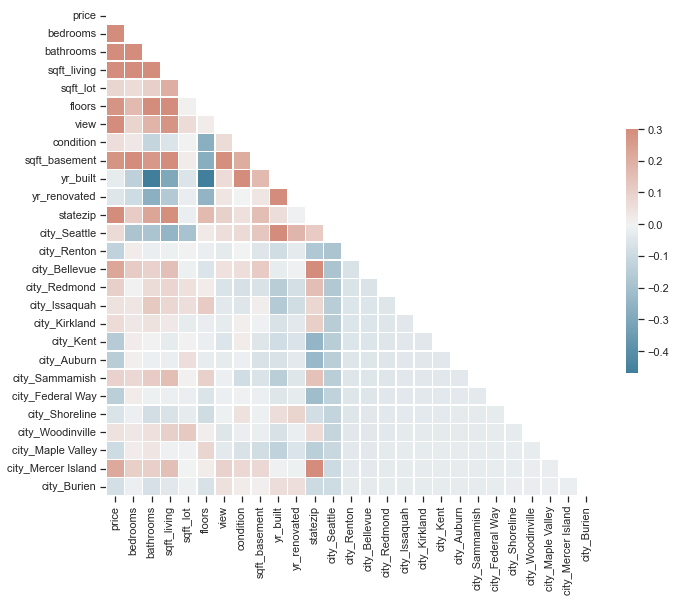

In [42]:
pearson_corr(df)

In [43]:
targets = df.price
features = df.drop('price', axis=1)

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'sqft_basement', 'yr_built', 'yr_renovated', 'statezip',
       'city_Seattle', 'city_Renton', 'city_Bellevue', 'city_Redmond',
       'city_Issaquah', 'city_Kirkland', 'city_Kent', 'city_Auburn',
       'city_Sammamish', 'city_Federal Way', 'city_Shoreline',
       'city_Woodinville', 'city_Maple Valley', 'city_Mercer Island',
       'city_Burien'],
      dtype='object')


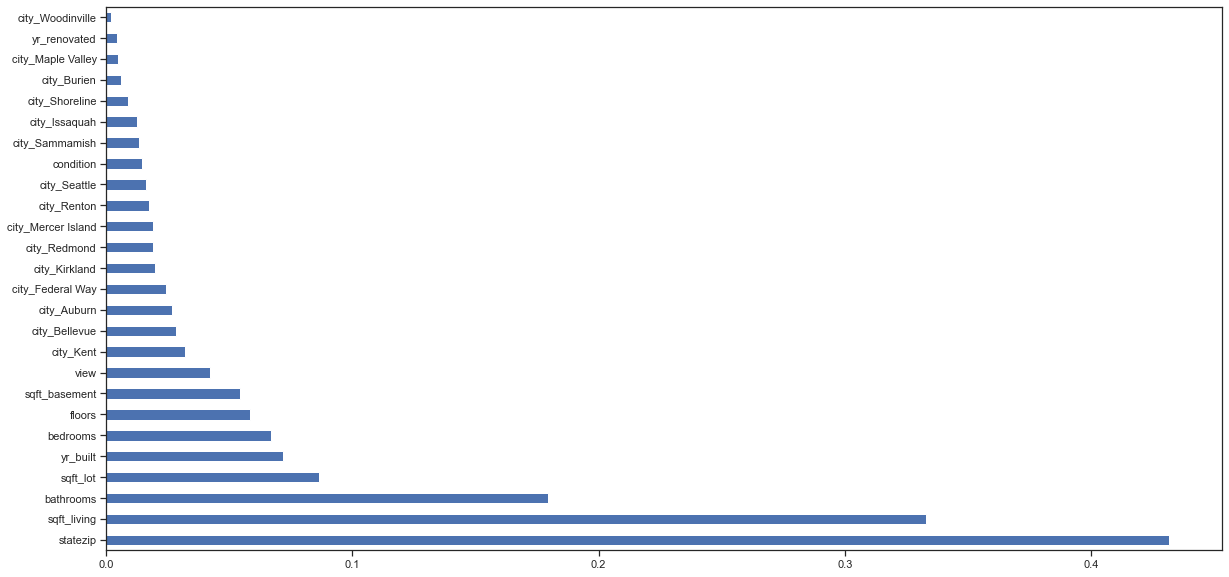

In [44]:
# determine the mutual information for classification 
# output a value between [0,1], the higher the value the more dependent on target values
mutual_info = mutual_info_regression(features, targets)
# convert into series and get column names 
mutual_info = pd.Series(mutual_info)
mutual_info.index = features.columns

# plot ordered mutual_info values per feature 
mutual_info.sort_values(ascending=False).plot(kind='barh', figsize=(20,10))
print(mutual_info.index)


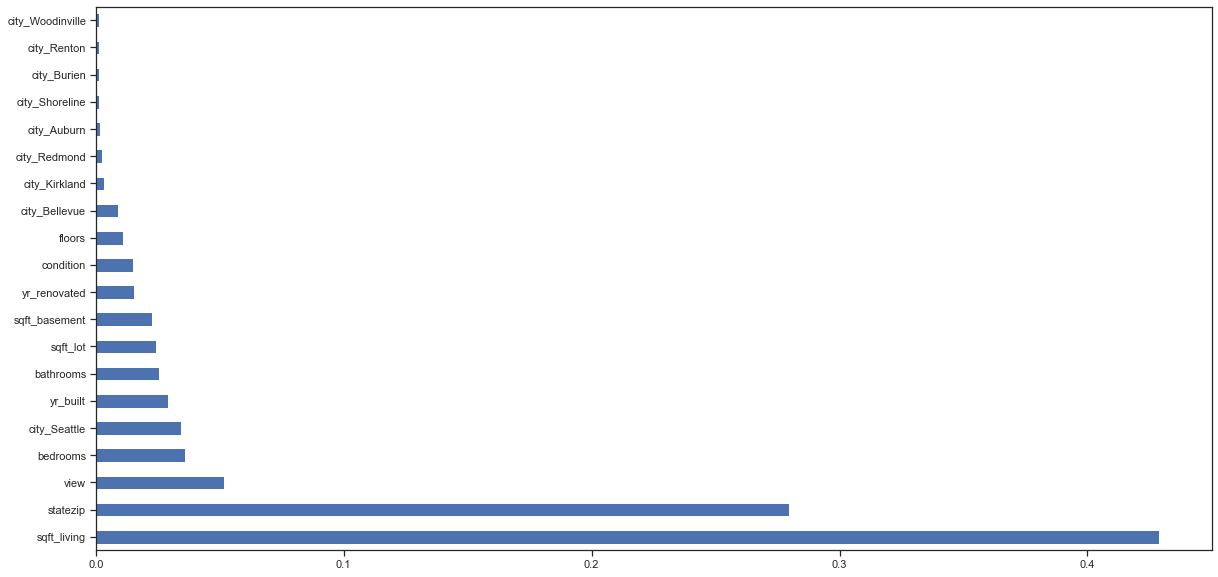

Index(['sqft_living', 'statezip', 'view', 'bedrooms', 'city_Seattle',
       'yr_built', 'bathrooms', 'sqft_lot', 'sqft_basement', 'yr_renovated',
       'condition', 'floors', 'city_Bellevue', 'city_Kirkland', 'city_Redmond',
       'city_Auburn', 'city_Shoreline', 'city_Burien', 'city_Renton',
       'city_Woodinville'],
      dtype='object')


In [45]:
model = ExtraTreeRegressor()
model.fit(features, targets)

# plot the feature importance
feat_importance = pd.Series(model.feature_importances_, index = features.columns)
feat_importance.nlargest(20).plot(kind='barh', figsize=(20,10))
plt.show()
print(feat_importance.nlargest(20).index)


# Get the top 2 features and plot as 3-Dimensional plot with target values

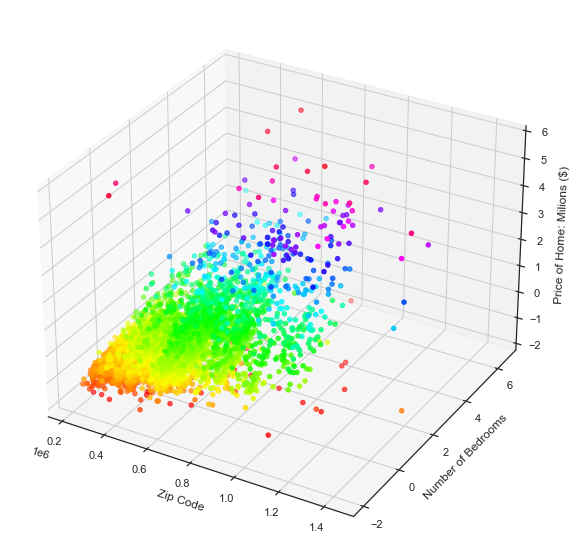

In [54]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection="3d")

z_points = df['price']
x_points = df['statezip']
y_points = df['sqft_living']
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv')

ax.set_xlabel('Zip Code')
ax.set_ylabel('Number of Bedrooms')
ax.set_zlabel('Price of Home: Milions ($)')
plt.show()

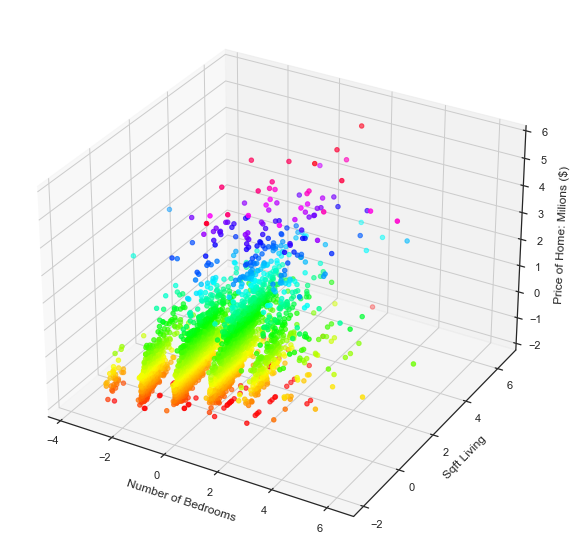

In [52]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection="3d")

z_points = df['price']
x_points = df['bedrooms']
y_points = df['sqft_living']
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv')

ax.set_xlabel('Number of Bedrooms')
ax.set_ylabel('Sqft Living')
ax.set_zlabel('Price of Home: Milions ($)')
plt.show()

In [48]:
df.to_csv('../inputs/train_no_scale.csv', index=False)

# Scaling features 
- If model used gradient descent, use scaling (ANN, Linear Regression, Logistic-Regression, etc)
- If scaling is needed, implement Standard Scaler (z-score), Gussian Distribution, etc

In [49]:
scaled_col = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'condition', 'sqft_basement', 'yr_built', 'yr_built', 'yr_built']

def transform_feature_scale(df, feature):
    scaler = StandardScaler()
    df[feature] = scaler.fit_transform(df[[feature]])
    
for i in scaled_col:
    transform_feature_scale(df, i)

In [50]:
df.to_csv('../inputs/train_scale.csv', index=False)